# Using KNN Algorithm to predict if a person will have diabetes or not


#### A supervised machine learning algorithm (as opposed to an unsupervised machine learning algorithm) is one that relies on labeled input data to learn a function that produces an appropriate output when given new unlabeled data.
#### Supervised machine learning algorithms are used to solve classification or regression problems.
#### classification - 0/1

### importing libraries

In [1]:
import numpy as np
import pandas as pd
import copy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### loading the dataset

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Replace columns like [Gluscose,BloodPressure,SkinThickness,BMI,Insulin] with Zero as values with mean of respective column

In [4]:
zero_not_accepted = ['Glucose','BloodPressure','SkinThickness','BMI','Insulin']
# for col in zero_not_accepted:
#     for i in data[col]:
#         if i==0:
#             colSum = sum(data[col])
#             meanCol=colSum/len(data[col])
#             data[col]=meanCol

for col in zero_not_accepted:
    data[col]= data[col].replace(0,np.NaN)
    mean = int(data[col].mean(skipna=True))
    data[col] = data[col].replace(np.NaN,mean)


### extracting independent variables

In [5]:
X = data.iloc[:,0:8]

### extracting dependent variable

In [6]:
y = data.iloc[:,8]

### Explorning data to know relation before processing

<AxesSubplot:>

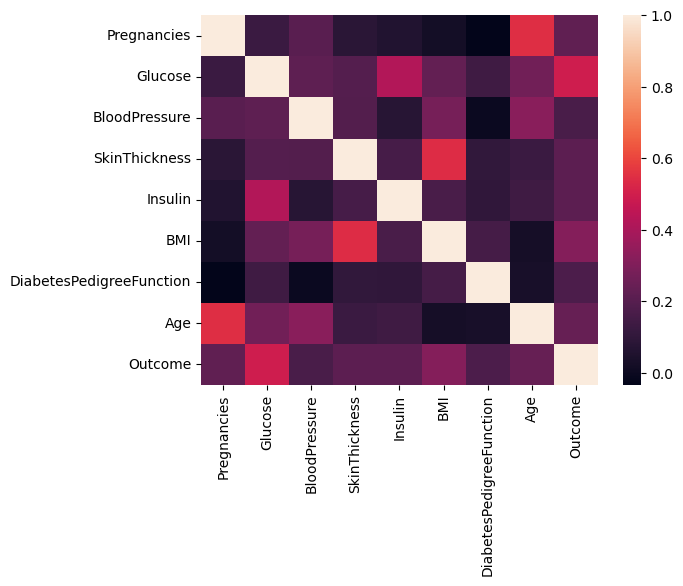

In [7]:
sns.heatmap(data.corr())

### splitting dataset into training and testing set

In [8]:
y = np.array(data['Outcome'])
Data=copy.deepcopy(data)
del Data['Outcome']
X = np.array(Data)

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=0)
print (" Training Data Set Dimensions=", X_train.shape, "Training True Class labels dimensions", y_train.shape) 
print (" Test Data Set Dimensions=", X_test.shape, "Test True Class labels dimensions", y_test.shape)  

 Training Data Set Dimensions= (691, 8) Training True Class labels dimensions (691,)
 Test Data Set Dimensions= (77, 8) Test True Class labels dimensions (77,)


In [10]:
def Euclidian_Distance(pred,actual):
    #distance = √ a2 + b2 
    return np.linalg.norm(pred - actual)


In [11]:
def getKNearest(distances,k):
    # Sort on the basis of distances and label
    # Get top k distances from the list of values
    distances.sort(key=lambda x: x[0], reverse=True)
    return distances[:k]

In [12]:
def getClasses(k_nearest):
    # From the tuples list - k_nearest, fetch the classes only and return their list
    return [i[1] for i in k_nearest]

In [13]:
def getMaxClass(classes):
    v, c = np.unique(classes, return_counts = True)
    return v[np.argmax(c)]
        # Get the Max Class using np unique to get the count of each class

In [14]:
def KNN(X_train, X_test, y_train, k):
     # make list pred
  pred = []
     # Iterate over the entire test set
  for x in range(len(X_test)):
       # make an info list 
    info = []
       # Iterate over the etire training set
    for j in X_train:
        # Calculate the euclidean Distance of test and train
        # add eucl. dist and the label to the info list #(you will get the label from the y_train)
        # thus info list will be list of tupples
      info.append(tuple((Euclidian_Distance(X_train[x],j), y_train[x]))) 
    
      # Find the k nearest info labels #(you will have list of tupples)
    K_nearest = getKNearest(info, k)
      # Get the classes from the info labels #(you will have list of 0/1 (lables))
    classes = getClasses(K_nearest)
    pred.append(getMaxClass(classes))
      # The predicted class will be the one with the highest score  (use max fun to get pred1)
      # add pred1 to list pred
      # return pred  
  print("pred", pred)     
  return pred

In [15]:
def Accuracy (prediction,Ytest):
  correct = 0.000000
  for i in range (len(prediction)):
    if (prediction[i] == Ytest[i]):
        correct += 1  

  accuracy = correct/len(Ytest)
  print ("Accuracy Score is: ", accuracy)
  return accuracy

In [16]:
# Run your model by passing on different values of k and print the preddicted, actual values and accuracy
 
# Set the range of k values to test
values = range(1, 5)

# Iterate through each k value
for k in values:
    # Run the KNN algorithm and get the predictions
    predictions = KNN(X_train, X_test, y_train, k)

    # Calculate the accuracy of the KNN algorithm
    knn_accuracy = Accuracy(predictions, y_test)

    # Print the results for the current k value
    print("K = {}:".format(k))
    print("Predicted values: ", predictions)
    print("Actual values:    ", y_test.tolist())
    print("KNN Accuracy: {:.2f}%\n".format(knn_accuracy * 100))

pred [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0]
Accuracy Score is:  0.5714285714285714
K = 1:
Predicted values:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0]
Actual values:     [1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
KNN Accuracy: 57.14%

pred [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0